##  Banking Binary Classification Problem

### Problem
We would like to predict if given a bank client, are they likely to make a term deposit or not at the bank.

Dataset: bankingInfo.csv
     - if output == yes, then the client has made a term deposit at this bank, else they have not.

Project was built using the bc_ml_breast_cancer_pred.ipynb and the deep_learning.ipynb files provided by Dr. Sambriddhi Mainali along with the *A hands-on introduction to feed-forward neural networks using Tensorflow and Keras* Github Repository by Dr. Badri Adhikari found [here.](https://badriadhikari.github.io/AI-2022spring/NN-using-TF.html) 

### Phase 1: Data Analysis & Preparation
____
#### 1.1 Exploring our Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

In [2]:
#low_memory=False used to remove the warning for mixed data types in each columns
original_dataset = pd.read_csv('./bankingInfo.csv', low_memory=False)
original_dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,output
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
original_dataset.shape

(41188, 21)

In [4]:
# Check for Missing Values
original_dataset.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
output            0
dtype: int64

##### There are no missing cell values at this time however lets examine if there are unknown values in our categorical data that need to be handled. 

In [5]:
original_dataset.value_counts('education')

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

In [6]:
original_dataset.value_counts('job')

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [7]:
original_dataset.value_counts('marital')

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

In [8]:
original_dataset.value_counts('output')

output
no     36548
yes     4640
Name: count, dtype: int64

In [9]:
original_dataset.value_counts('default')

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

In [10]:
original_dataset.value_counts('housing')

housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

In [11]:
original_dataset.value_counts('loan')

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

In [12]:
original_dataset.value_counts('poutcome')

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

#### 1.2 Cleaning and Preparing Our Dataset
Our dataset has a lot of categorical and unknown data values. In order to work with it and be able to visualize it we must first convert all non-numerical data to numerical data and remove unknown values. We also can determine at this time if all features of our dataset are useful or may be removed at this time. 

In [13]:
# Remove Unnecessary Features/Columns and store in New Cleaned Dataset
cleaned_data = original_dataset

#drop columns that is not relative to the problem
# Per dataset author these columns are useful for a baseline but interfere in the accuracy of a prediction model so will be removed
cleaned_data = cleaned_data.drop(['duration'], axis=1)
cleaned_data = cleaned_data.drop(['month'], axis=1)
cleaned_data = cleaned_data.drop(['day_of_week'], axis=1) 
# all contacts were done by telephone or cellphone, essentially the same type of device so this is not going to impact results
cleaned_data = cleaned_data.drop(['contact'], axis=1)
cleaned_data = cleaned_data.drop(['nr.employed'], axis=1) #number of employees at the bank will not impact this problem
cleaned_data = cleaned_data.drop(['default'], axis=1) # is all one value after dropping uknowns

# Remove the unknown rows from dataset for variables like education - only 1700 rows are unknown a very small portion of our data  
cleaned_data = cleaned_data[cleaned_data.education != 'unknown']
cleaned_data = cleaned_data[cleaned_data.job != 'unknown']
cleaned_data = cleaned_data[cleaned_data.marital != 'unknown']
cleaned_data = cleaned_data[cleaned_data.housing != 'unknown']
cleaned_data = cleaned_data[cleaned_data.loan != 'unknown']

In [16]:
#Convert Non-Numeric Data to Numeric Data
cleaned_data['output'] = cleaned_data['output'].replace({'no': 0, 'yes': 1})
cleaned_data['housing'] = cleaned_data['housing'].replace({'no': 0, 'yes': 1})
cleaned_data['loan'] = cleaned_data['loan'].replace({'no': 0, 'yes': 1})
cleaned_data['poutcome'] = cleaned_data['poutcome'].replace({'nonexistent': 0, 'failure': 0, 'success': 1})

# Education has an inherently hierarchical structure so it can be easily converted to number categories in order of education level attained
cleaned_data['education'] = cleaned_data['education'].replace({'illiterate': 0, 'basic.4y': 1,  'basic.6y': 2, 'basic.9y': 3, 'high.school': 4, 'professional.course': 5, 'university.degree': 6})
cleaned_data.head()

,age,job,marital,education,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,output
0,56,housemaid,married,1,0,0,1,999,0,0,1.1,93.994,-36.4,4.857,0
1,57,services,married,4,0,0,1,999,0,0,1.1,93.994,-36.4,4.857,0
2,37,services,married,4,1,0,1,999,0,0,1.1,93.994,-36.4,4.857,0
3,40,admin.,married,2,0,0,1,999,0,0,1.1,93.994,-36.4,4.857,0
4,56,services,married,4,0,1,1,999,0,0,1.1,93.994,-36.4,4.857,0


In [17]:
marital_for_pie = cleaned_data['marital']
marital_dummies = pd.get_dummies(cleaned_data.marital, dtype = int)
# Merge and check work 
cleaned_data = pd.concat([cleaned_data, marital_dummies],axis = 'columns')
cleaned_data.head(10)

,age,job,marital,education,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,output,divorced,married,single
0,56,housemaid,married,1,0,0,1,999,0,0,1.1,93.994,-36.4,4.857,0,0,1,0
1,57,services,married,4,0,0,1,999,0,0,1.1,93.994,-36.4,4.857,0,0,1,0
2,37,services,married,4,1,0,1,999,0,0,1.1,93.994,-36.4,4.857,0,0,1,0
3,40,admin.,married,2,0,0,1,999,0,0,1.1,93.994,-36.4,4.857,0,0,1,0
4,56,services,married,4,0,1,1,999,0,0,1.1,93.994,-36.4,4.857,0,0,1,0
5,45,services,married,3,0,0,1,999,0,0,1.1,93.994,-36.4,4.857,0,0,1,0
6,59,admin.,married,5,0,0,1,999,0,0,1.1,93.994,-36.4,4.857,0,0,1,0
8,24,technician,single,5,1,0,1,999,0,0,1.1,93.994,-36.4,4.857,0,0,0,1
9,25,services,single,4,1,0,1,999,0,0,1.1,93.994,-36.4,4.857,0,0,0,1
11,25,services,single,4,1,0,1,999,0,0,1.1,93.994,-36.4,4.857,0,0,0,1


In [18]:
job_for_pie = cleaned_data['job'] #copy over original column for pie plot later
job_dummies = pd.get_dummies(cleaned_data.job, dtype = int)
# Merge and check work 
cleaned_data = pd.concat([cleaned_data, job_dummies],axis = 'columns')
cleaned_data.head(10)

,age,job,marital,education,housing,loan,campaign,pdays,previous,poutcome,...,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,56,housemaid,married,1,0,0,1,999,0,0,...,0,0,1,0,0,0,0,0,0,0
1,57,services,married,4,0,0,1,999,0,0,...,0,0,0,0,0,0,1,0,0,0
2,37,services,married,4,1,0,1,999,0,0,...,0,0,0,0,0,0,1,0,0,0
3,40,admin.,married,2,0,0,1,999,0,0,...,0,0,0,0,0,0,0,0,0,0
4,56,services,married,4,0,1,1,999,0,0,...,0,0,0,0,0,0,1,0,0,0
5,45,services,married,3,0,0,1,999,0,0,...,0,0,0,0,0,0,1,0,0,0
6,59,admin.,married,5,0,0,1,999,0,0,...,0,0,0,0,0,0,0,0,0,0
8,24,technician,single,5,1,0,1,999,0,0,...,0,0,0,0,0,0,0,0,1,0
9,25,services,single,4,1,0,1,999,0,0,...,0,0,0,0,0,0,1,0,0,0
11,25,services,single,4,1,0,1,999,0,0,...,0,0,0,0,0,0,1,0,0,0


In [19]:
#Remove the Marital and job columns
cleaned_data = cleaned_data.drop(['marital'], axis=1)
cleaned_data = cleaned_data.drop(['job'], axis=1) 

#move column 'output' to the end
cleaned_data = cleaned_data[[col for col in cleaned_data.columns if col != 'output'] + ['output']]
cleaned_data.head(10)

,age,education,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,output
0,56,1,0,0,1,999,0,0,1.1,93.994,...,0,1,0,0,0,0,0,0,0,0
1,57,4,0,0,1,999,0,0,1.1,93.994,...,0,0,0,0,0,1,0,0,0,0
2,37,4,1,0,1,999,0,0,1.1,93.994,...,0,0,0,0,0,1,0,0,0,0
3,40,2,0,0,1,999,0,0,1.1,93.994,...,0,0,0,0,0,0,0,0,0,0
4,56,4,0,1,1,999,0,0,1.1,93.994,...,0,0,0,0,0,1,0,0,0,0
5,45,3,0,0,1,999,0,0,1.1,93.994,...,0,0,0,0,0,1,0,0,0,0
6,59,5,0,0,1,999,0,0,1.1,93.994,...,0,0,0,0,0,0,0,0,0,0
8,24,5,1,0,1,999,0,0,1.1,93.994,...,0,0,0,0,0,0,0,1,0,0
9,25,4,1,0,1,999,0,0,1.1,93.994,...,0,0,0,0,0,1,0,0,0,0
11,25,4,1,0,1,999,0,0,1.1,93.994,...,0,0,0,0,0,1,0,0,0,0


In [20]:
cleaned_data.shape


(38245, 27)

#### 1.3 Visualizing the Dataset 
#### Distribution of the Input Features

In [21]:
# Get the basic statistical information such as the mean and std of the cleaned data set
cleaned_data.describe()

,age,education,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,output
count,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,...,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000
mean,39.860871,4.167342,0.538057,0.155811,2.566662,963.531651,0.170009,0.032501,0.082861,93.570313,...,0.035560,0.025807,0.071330,0.041234,0.035273,0.097163,0.017989,0.166819,0.025180,0.111335
std,10.289488,1.635449,0.498556,0.362681,2.767473,184.295254,0.487169,0.177329,1.565945,0.576367,...,0.185193,0.158562,0.257378,0.198834,0.184470,0.296184,0.132914,0.372819,0.156673,0.314550
min,17.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,3.000000,0.000000,0.000000,1.000000,999.000000,0.000000,0.000000,-1.800000,93.075000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,4.000000,1.000000,0.000000,2.000000,999.000000,0.000000,0.000000,1.100000,93.444000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.000000,6.000000,1.000000,0.000000,3.000000,999.000000,0.000000,0.000000,1.400000,93.994000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,98.000000,6.000000,1.000000,1.000000,43.000000,999.000000,7.000000,1.000000,1.400000,94.767000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


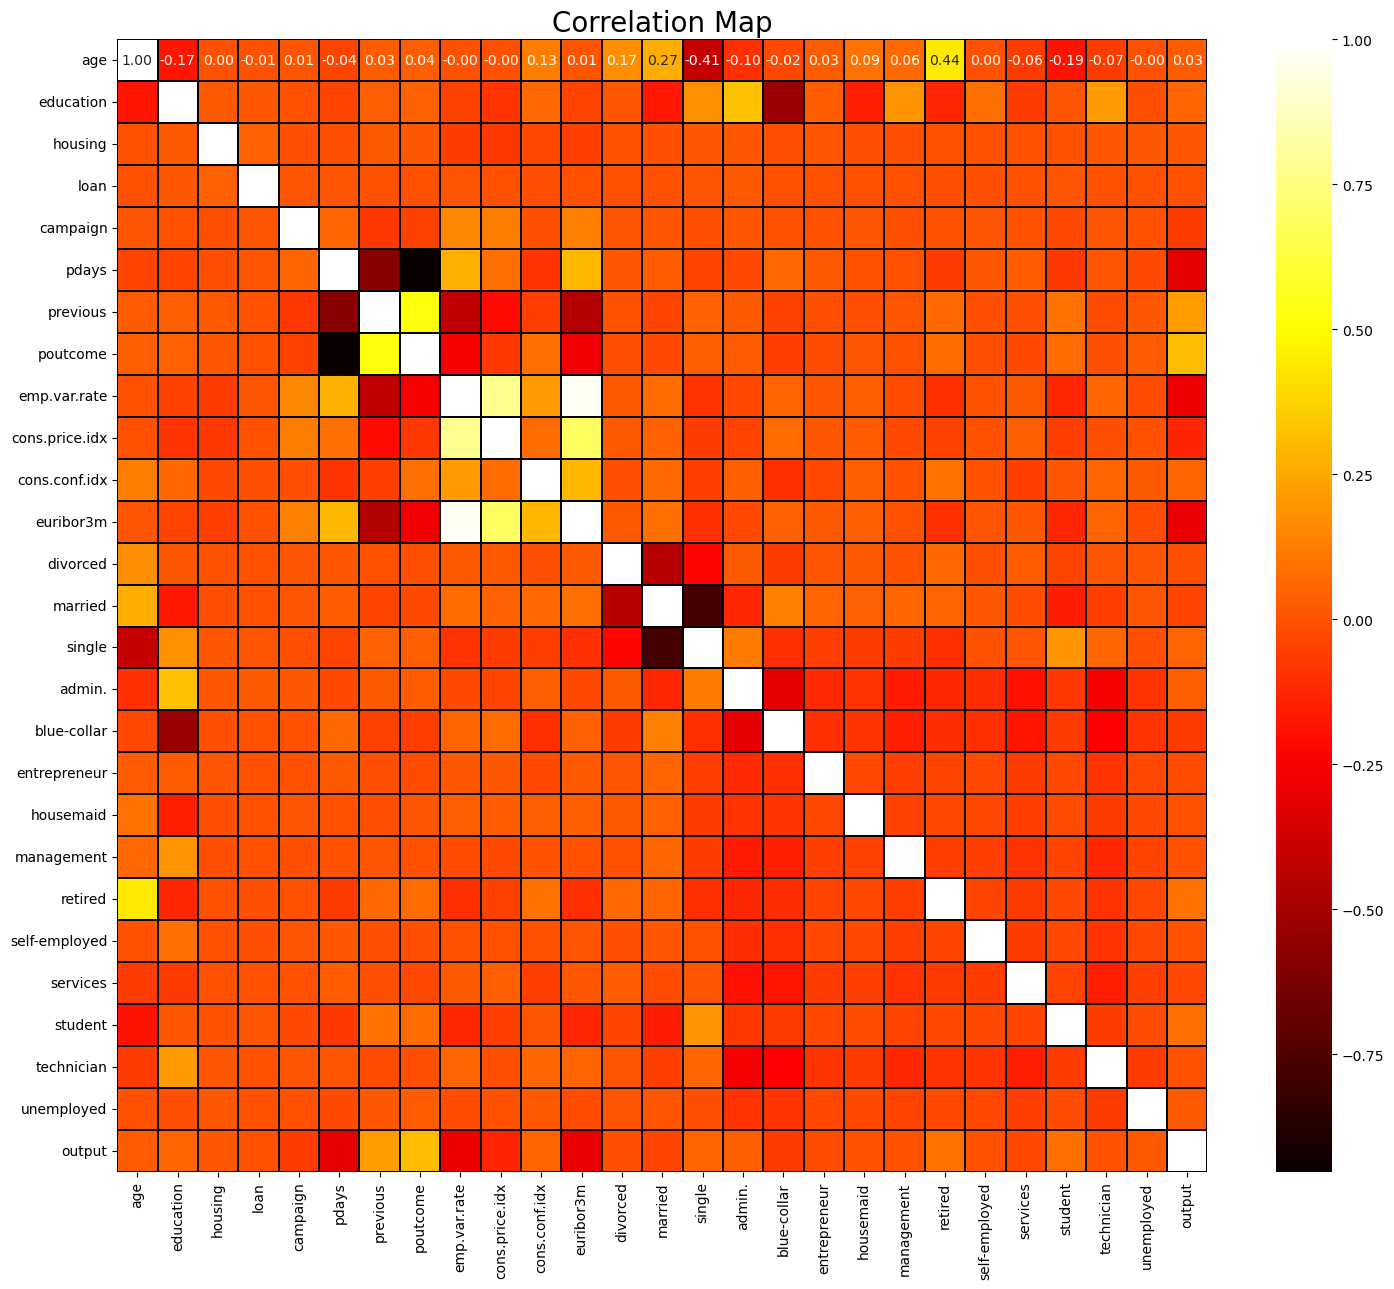

In [22]:
# View the Correlation between features
plt.figure(figsize=(15, 13))
sns.heatmap(data=cleaned_data.corr(), annot=True, cmap="hot", linewidths=0.1, fmt=".2f", linecolor="black")
plt.title("Correlation Map", fontsize=20)
plt.tight_layout()
plt.show()

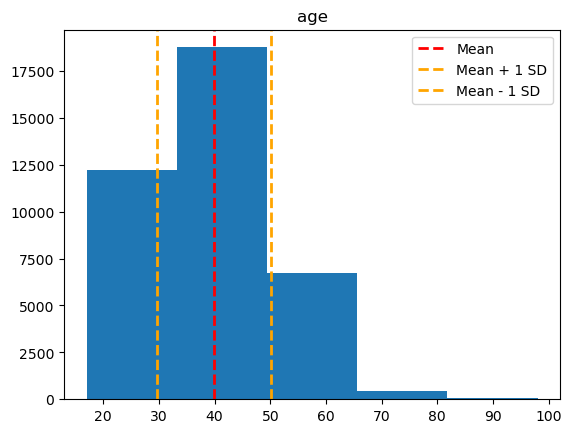

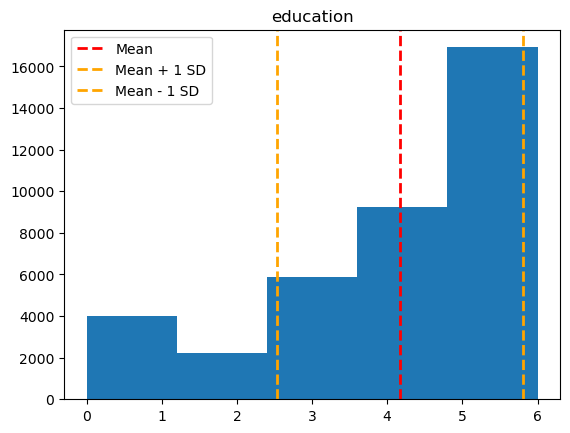

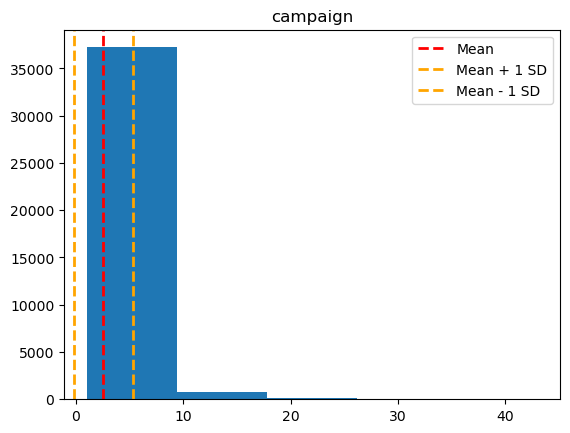

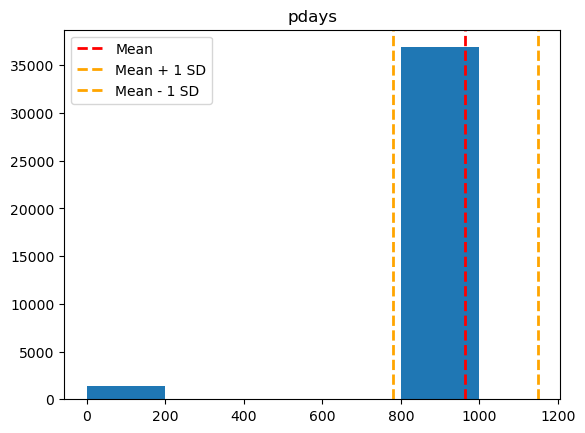

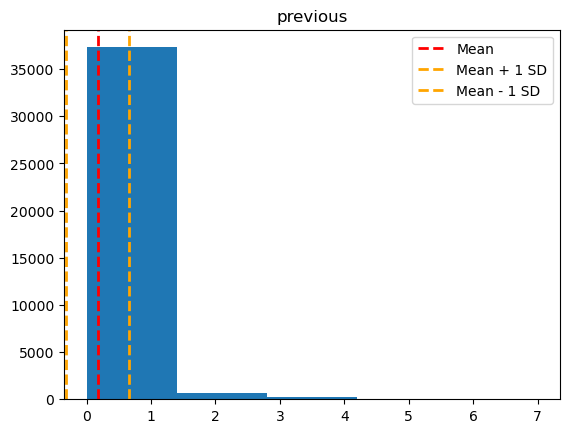

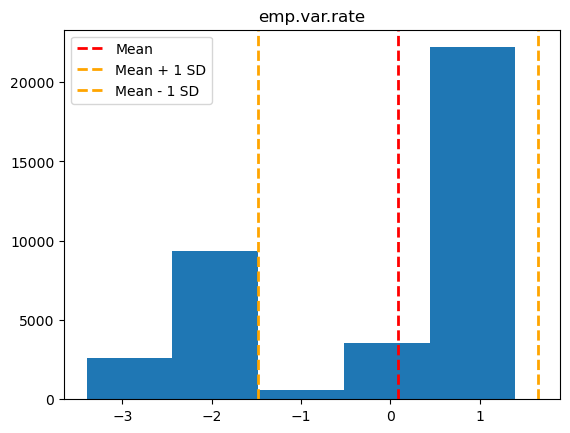

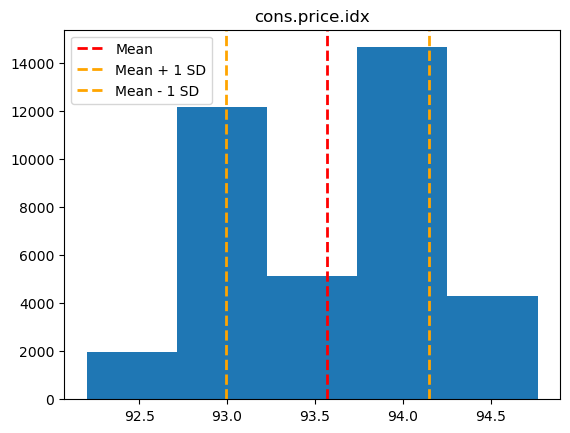

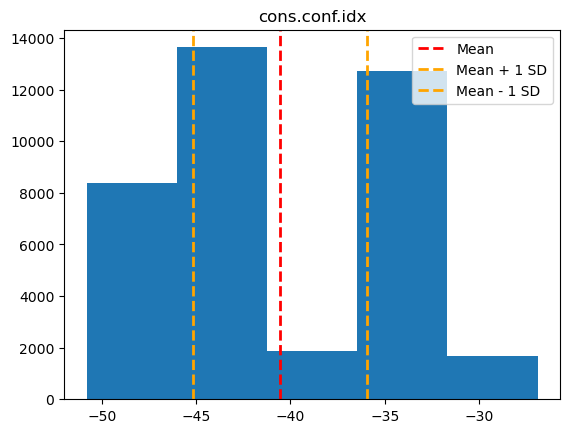

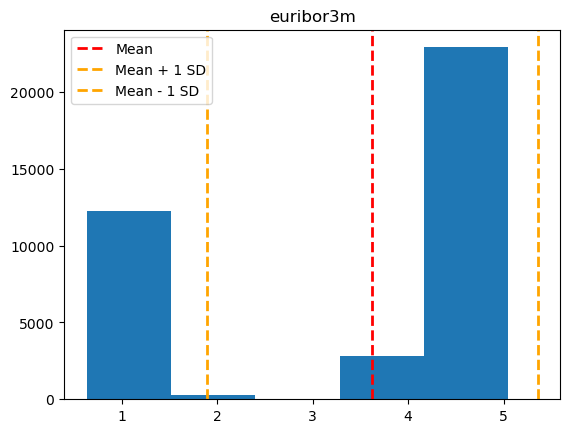

In [23]:
# for i in cleaned_data.columns[0:]:
#     # skip binary features a histogram is not a useful visualization for binary data
#     if len(cleaned_data[i].unique()) > 2:
#         plt.hist(cleaned_data[i])
#         plt.title(i)
#         plt.show()
for i in cleaned_data.columns[0:]:
    # skip binary features a histogram is not a useful visualization for binary data
    if len(cleaned_data[i].unique()) > 2:
        plt.hist(cleaned_data[i], bins=5)  # You can adjust the number of bins as needed
        plt.title(i)
        # Calculate mean and standard deviation
        mean_val = cleaned_data[i].mean()
        std_val = cleaned_data[i].std()
        # Add mean and standard deviation to the plot
        plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label='Mean')
        plt.axvline(mean_val + std_val, color='orange', linestyle='dashed', linewidth=2, label='Mean + 1 SD')
        plt.axvline(mean_val - std_val, color='orange', linestyle='dashed', linewidth=2, label='Mean - 1 SD')
        # Display the legend
        plt.legend()
        plt.show()

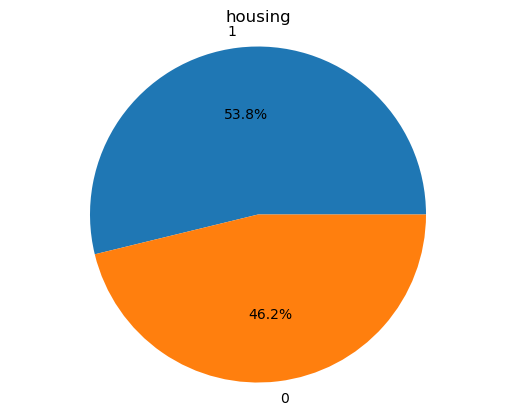

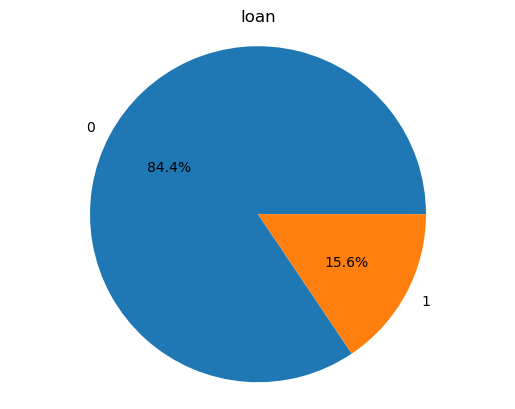

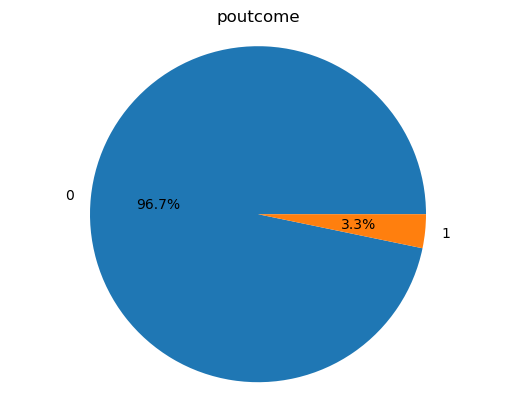

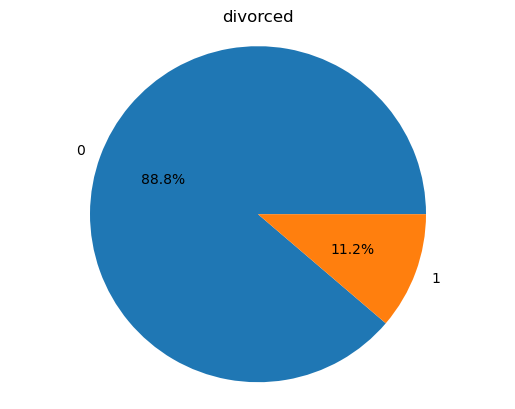

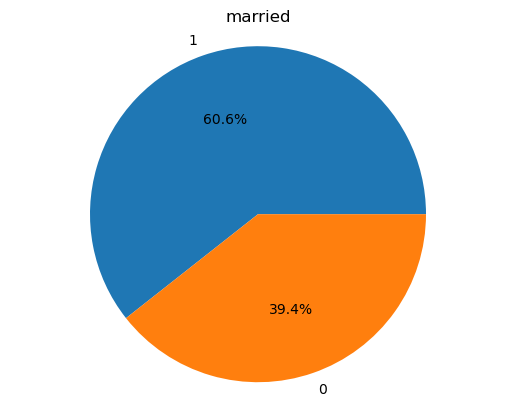

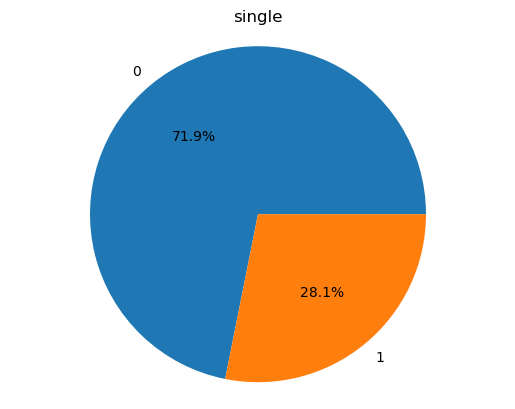

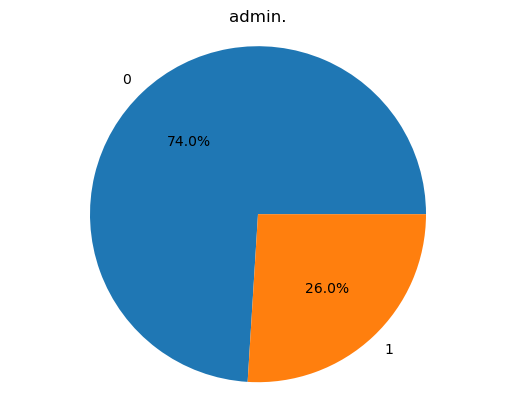

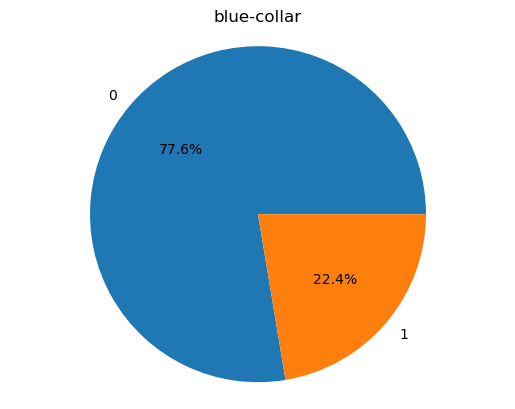

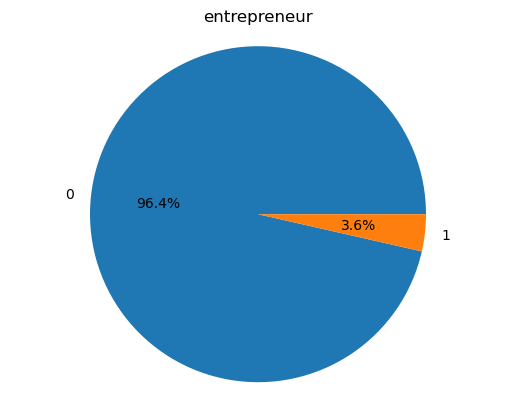

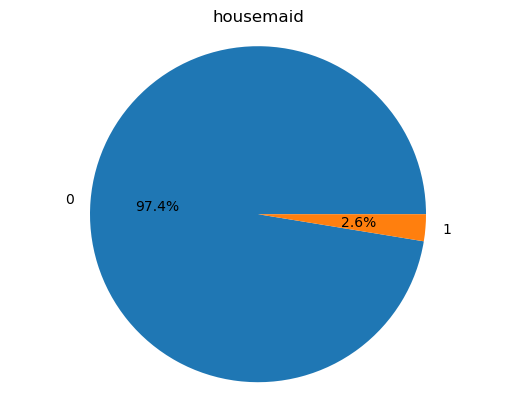

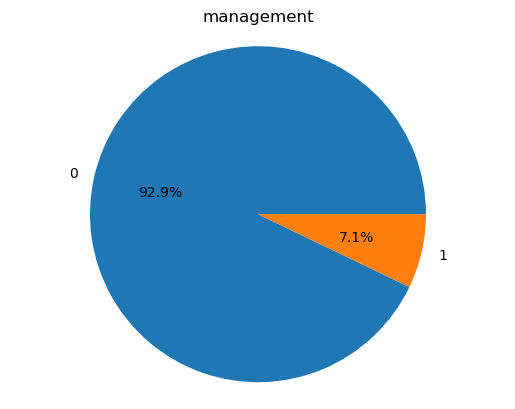

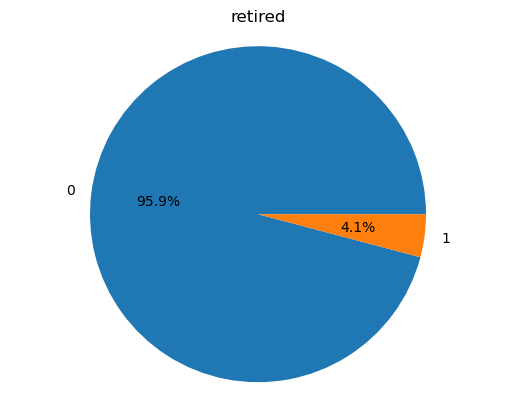

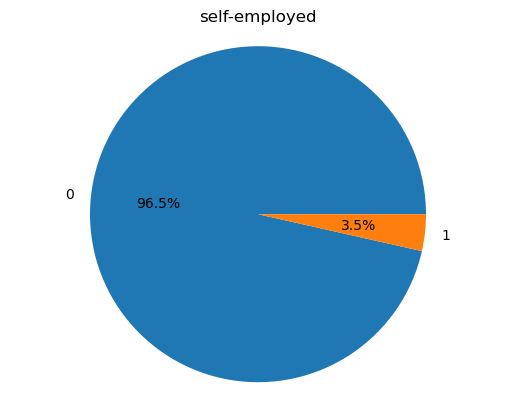

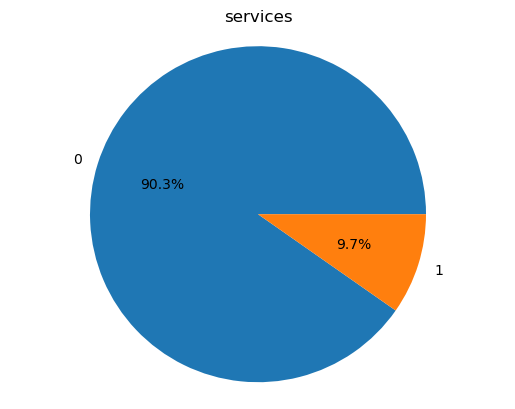

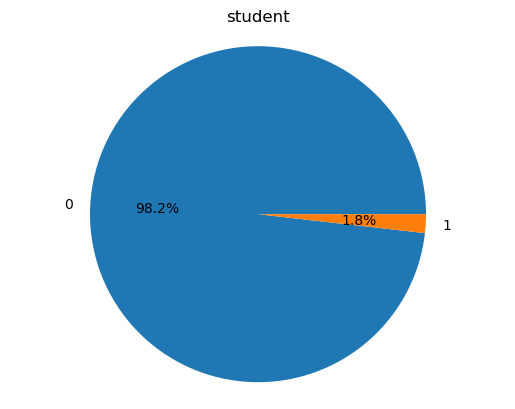

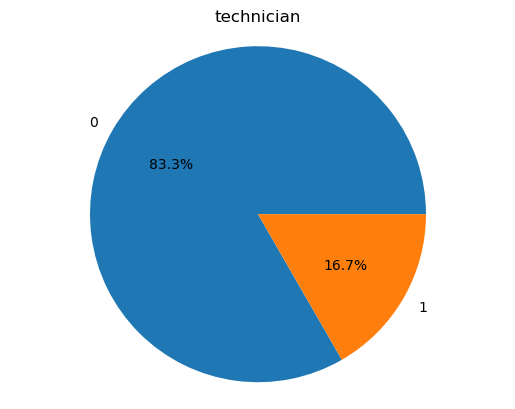

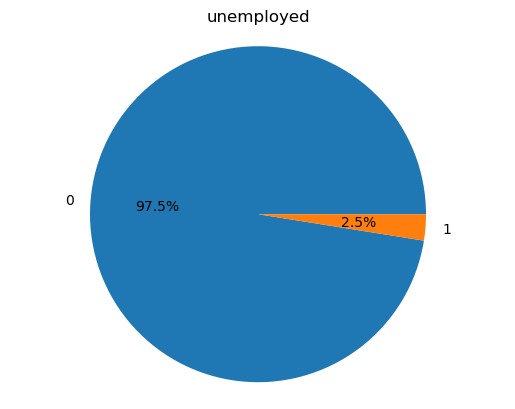

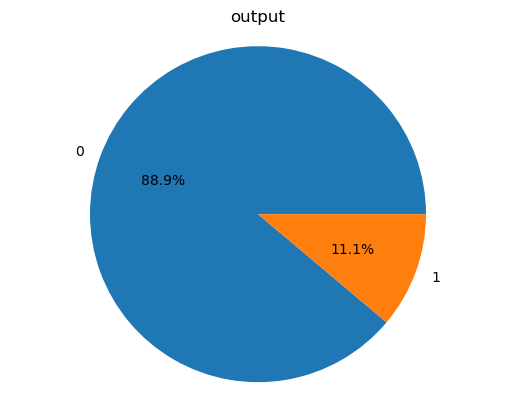

In [24]:
for i in cleaned_data.columns[0:]:
    if len(cleaned_data[i].unique()) == 2:
        # Count the occurrences of each unique value
        counts = cleaned_data[i].value_counts()
        plt.figure()
        plt.pie(counts, labels=counts.index, autopct="%1.1f%%")
        plt.title(i)
        plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.show()

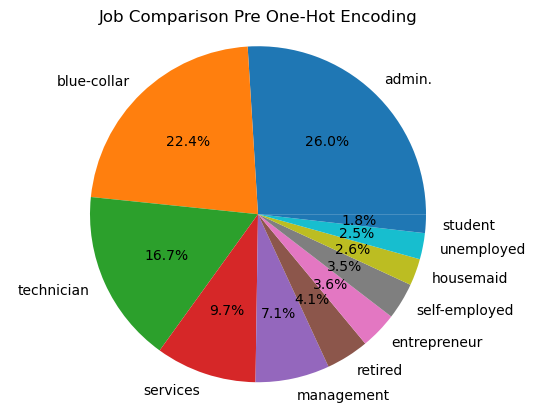

In [25]:
#job breakdown pre one-hot encoding
counts = job_for_pie.value_counts()
plt.figure()
plt.pie(counts, labels=counts.index, autopct="%1.1f%%")
plt.title('Job Comparison Pre One-Hot Encoding')
plt.axis("equal")
plt.show()

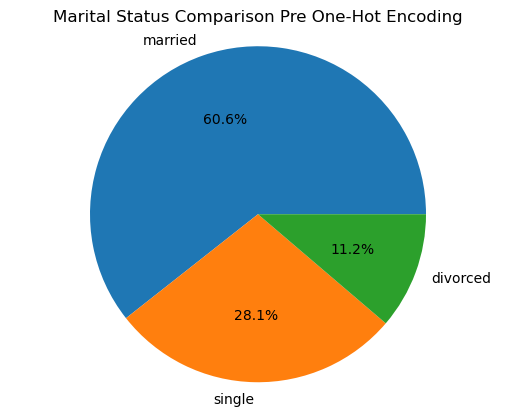

In [26]:
#marital status breakdown pre one-hot encoding
counts = marital_for_pie.value_counts()
plt.figure()
plt.pie(counts, labels=counts.index, autopct="%1.1f%%")
plt.title('Marital Status Comparison Pre One-Hot Encoding')
plt.axis("equal") 
plt.show()

#### Look at the Distribution of the OutputLooking at the graph below it is clear that this data is iimbalanced and will need to be resample in order to produce a better prediction model. Methods for resampling include  oversampling, undersampling, or generate synthetic samples Since we have nearly 9 data points for the clients who did not complete a term deposit for every 1 data point for the client who did make a term deposit it makes sense to undersample the data. To do this I will randomly choose from the number of clients who did not make a deposit to make a set that is same size as the set of clients who did make a deposit. .

C:\Users\kelly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kelly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kelly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='output', ylabel='count'>

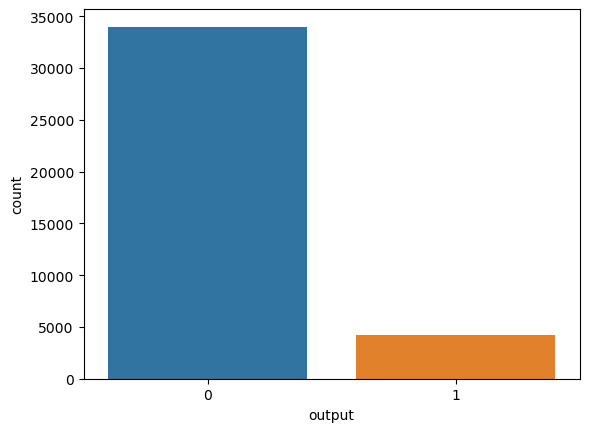

In [27]:
#visual representation of the unbalanced data
sns.countplot(x=cleaned_data["output"])

#### 1.4 Down Sample Data

In [28]:
cleaned_data.value_counts('output')

output
0    33987
1     4258
Name: count, dtype: int64

In [29]:
from sklearn.utils import resample

# Split the data based on corona value
false_output = cleaned_data[cleaned_data.output == 0]
true_output= cleaned_data[cleaned_data.output == 1]

# Downsample the majority/negative samples
false_downsampled = resample(false_output,
                                   replace=False,    # sample without replacement
                                   n_samples=len(true_output),  # to match minority class
                                   random_state=42)  # reproducible results

# Combine minority class with downsampled majority class
downsampled_data = pd.concat([false_downsampled, true_output])

# Display new class counts
downsampled_data.output.value_counts()

output
0    4258
1    4258
Name: count, dtype: int64

C:\Users\kelly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kelly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kelly\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='output', ylabel='count'>

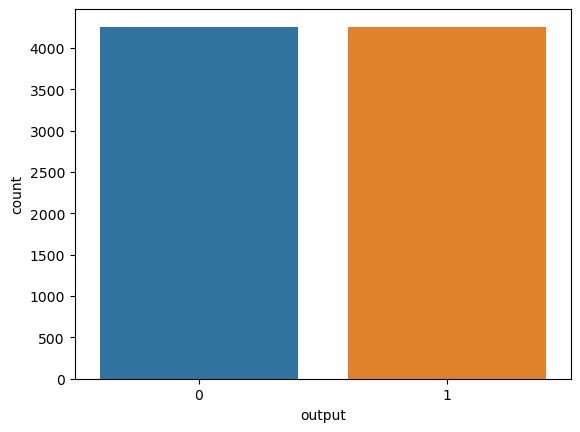

In [30]:
#visual representation of the now balanced data
sns.countplot(x=downsampled_data["output"])

#### 1.5 Export Final Cleaned Dataset

In [31]:
downsampled_data.to_csv('cleaned_banking_data.csv',index=False)